In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import datetime


In [26]:
#url = "https://app.box.com/s/jm6pw202asu4xd3uypwtry2rqk691y1i"
data = pd.read_csv('train.csv')

In [27]:
#Find missing values in the dataset
missing_count = data.isna().sum()
print(missing_count)

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64


In [28]:
#b.Remove units of attributes (kmpl from "Mileage", CC from "Engine", bhp from "Power", and lakh from "New_price")
data['Mileage'] = data['Mileage'].str.split(' ', expand=True)[0].astype(float)
data['Engine'] = data['Engine'].str.split(' ', expand=True)[0].astype(float)
data['Power'] = data['Power'].str.split(' ', expand=True)[0].astype(float)
data['New_Price'] = data['New_Price'].str.split(' ', expand=True)[0].astype(float)
print(data.head())

   Unnamed: 0                              Name    Location  Year  \
0           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
1           2                      Honda Jazz V     Chennai  2011   
2           3                 Maruti Ertiga VDI     Chennai  2012   
3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4           6            Nissan Micra Diesel XV      Jaipur  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              41000    Diesel       Manual      First    19.67  1582.0   
1              46000    Petrol       Manual      First    13.00  1199.0   
2              87000    Diesel       Manual      First    20.77  1248.0   
3              40670    Diesel    Automatic     Second    15.20  1968.0   
4              86999    Diesel       Manual      First    23.08  1461.0   

    Power  Seats  New_Price  Price  
0  126.20    5.0        NaN  12.50  
1   88.70    5.0       8.61   4.50  
2   88.76    7.0       

<ipython-input-29-f40b4c05fd89>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Engine'], shade=True)


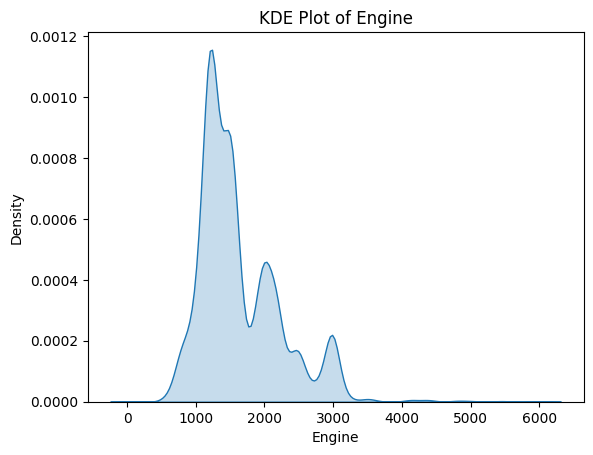

<ipython-input-29-f40b4c05fd89>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Power'], shade=True)


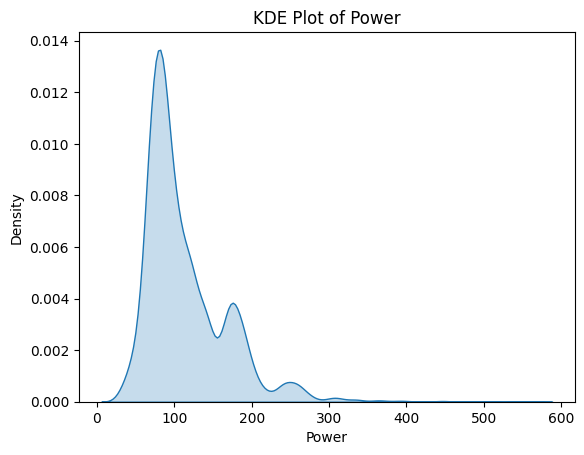

<ipython-input-29-f40b4c05fd89>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Seats'], shade=True)


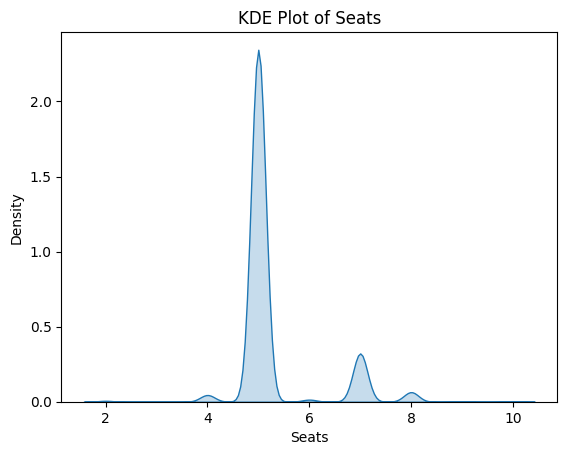

In [29]:
#a
sns.kdeplot(data['Engine'], shade=True)
plt.title('KDE Plot of Engine')
plt.show()

sns.kdeplot(data['Power'], shade=True)
plt.title('KDE Plot of Power')
plt.show()

sns.kdeplot(data['Seats'], shade=True)
plt.title('KDE Plot of Seats')
plt.show()

In [30]:
data.shape

(5847, 14)

In [31]:
#a.
#Filling missing values
#The data in these columns exhibits outliers and a slight skewness, but the mean
#and median values are relatively similar. Therefore, we can choose either the mean or median
engine_mean = data['Engine'].mean()
data['Engine'].fillna(engine_mean, inplace=True)
power_mean = data['Power'].mean()
data['Power'].fillna(power_mean, inplace=True)
seats_mean = data['Seats'].mean()
data['Seats'].fillna(seats_mean, inplace=True)


#Drop New_Price column
#The "New_Price" column contains a considerable number of missing values, approximately 5032 out of 5847 rows.
#Filling these missing values with mean, median, or mode can impact the model's performance.
#Additionally,there are several other factors such as engine size and mileage, which play a significant role in predicting the target variable.
data = data.drop(columns = ['New_Price'])
data.head()

missing_count = data.isna().sum()
print(missing_count)

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


In [32]:
data.shape

(5847, 13)

In [20]:
#c.One Hot Encoding
data = pd.get_dummies(data, columns=['Fuel_Type','Transmission'])
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,1,0,0,0,1
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,4.50,0,0,1,0,1
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,1,0,0,0,1
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,1,0,0,1,0
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,3.50,1,0,0,0,1


In [33]:
#d
present = datetime.datetime.now().year
data['Age'] = present - data['Year']
data['Mileage_per_Year'] = data['Mileage'] / data['Age']
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Mileage_per_Year
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,8,2.458750
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5.0,4.50,12,1.083333
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11,1.888182
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10,1.520000
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,10,2.308000
